## THE SPARK FOUNDATION TASK - #1 : PREDICTION USING SUPERVISED ML
### GRIP NOVEMBER21
### DONE BY B.KIRAN SAI
We are working with studying number of hours and scores corresponding data


### IMPORTING LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### IMPORTING DATASET

In [7]:
# reading data from url and printing 1st 5 rows
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### DATA PREPROCESSING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# checking is there any missing values in the data

df.isnull().mean()

Hours     0.0
Scores    0.0
dtype: float64

### DATA PLOTTING

<AxesSubplot:title={'center':'Hours vs Scores'}, xlabel='Hours', ylabel='Scores'>

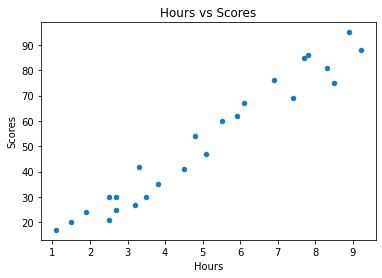

In [11]:
# scatter plot between Hours and Scores
df.plot(kind='scatter',x='Hours',y='Scores',title='Hours vs Scores')

<AxesSubplot:>

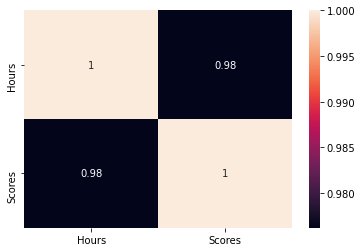

In [12]:
# finding co-relation using heatmap 
sns.heatmap(df.corr(),annot=df.corr())

#### Here, we can observe  'Hours' and  'Scores' are in positive co-relation.
#### relation is almost 1. 
#### therefore, when 'Hours' are increasing then 'scores' are also increasing

<AxesSubplot:>

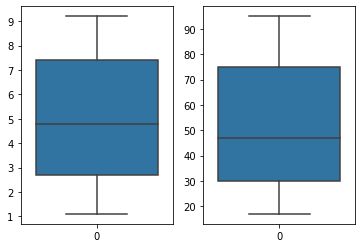

In [13]:
plt.subplot(1,2,1)
ax = sns.boxplot(data=df['Hours'])
plt.subplot(1,2,2)
sns.boxplot(data=df['Scores'])

#### There are no outliers in both the columns

### PREPARING DATA

In [14]:
# Dividing into input data and output data
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

### SPLITTING DATA

In [15]:
# training data to train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### TRAINING THE ML ALGORITHM

In [16]:
# training Linear regression algorithm (unsupervised ML)
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train,y_train)

LinearRegression()

C:\Users\ramak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression line for Hours vs Scores')

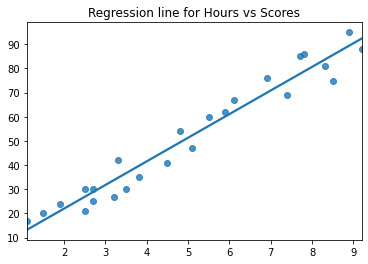

In [17]:
# making regression line between data
sns.regplot(X,y,ci=0)
plt.title('Regression line for Hours vs Scores')

### MAKING PREDICTIONS

In [18]:
y_pred = Regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Text(0, 0.5, 'Hours')

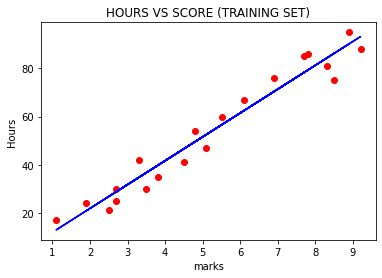

In [21]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,Regressor.predict(X_train),color='blue')
plt.title("HOURS VS SCORE (TRAINING SET)")
plt.xlabel('marks')
plt.ylabel('Hours')


Text(0, 0.5, 'Hours')

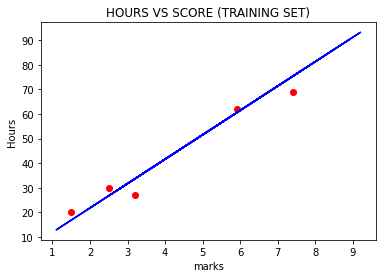

In [22]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,Regressor.predict(X_train),color='blue')
plt.title("HOURS VS SCORE (TEST SET)")
plt.xlabel('marks')
plt.ylabel('Hours')


### EVALUATING THE MODEL

In [13]:
from sklearn import metrics
print('mean absolute error :',metrics.mean_absolute_error(y_test,y_pred))

mean absolute error : 4.183859899002982


### PREDICTING VALUE FOR 9.25 HOURS

In [14]:
pres_pred = Regressor.predict([[9.25]])
print('Score for 9.25 Hours of study :',pres_pred[0])

Score for 9.25 Hours of study : 93.69173248737539
